# Import Required Libraries
Import necessary libraries such as NumPy and Matplotlib.

In [61]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the Maze
Define the maze as a 2D NumPy array with 'S' for start, 'G' for goal, and integers for paths and walls.

In [62]:
# Define the Maze
maze = np.array([
    [0, 'S', 0, 0, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [1, 0, 1, 0, 1, 1, 0, 1, 1, 0],
    [1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 1, 1, 1, 1, 1, 1, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 0, 0, 1, 0, 'G']
])
maze

array([['0', 'S', '0', '0', '1', '1', '1', '1', '1', '1'],
       ['1', '1', '1', '0', '1', '1', '0', '0', '0', '0'],
       ['1', '0', '0', '0', '0', '0', '0', '1', '1', '0'],
       ['1', '0', '1', '0', '1', '1', '0', '1', '1', '0'],
       ['1', '0', '0', '0', '0', '0', '0', '1', '1', '1'],
       ['1', '0', '1', '1', '1', '1', '1', '1', '1', '1'],
       ['1', '0', '0', '0', '0', '0', '0', '0', '1', '1'],
       ['0', '1', '1', '1', '1', '1', '1', '0', '0', '1'],
       ['0', '0', '0', '0', '0', '0', '1', '1', '0', '1'],
       ['1', '1', '1', '1', '1', '0', '0', '1', '0', 'G']], dtype='<U21')

# Convert Maze to Numeric Grid
Create a function to convert the maze into a numeric grid where 'S' becomes 2 and 'G' becomes 3.

In [63]:
# Convert Maze to Numeric Grid
def to_numeric_grid(maze):
    # maze = np.array(maze)
    # print(maze)
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == 'S':
                maze[i][j] = 2
            elif maze[i][j] == 'G':
                maze[i][j] = 3
            else:
                maze[i][j] = maze[i][j]
    return maze.astype(int)

numeric_maze = to_numeric_grid(maze)
numeric_maze

array([[0, 2, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [1, 0, 1, 0, 1, 1, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 0, 1, 0, 3]])

# Find Positions of Start and Goal
Implement a function to find the positions of 'S' and 'G' in the maze.

In [64]:
# Find Positions of Start and Goal
def find_pos(maze, value):
    maze = np.array(maze)
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == value:
                return (i, j)

start_pos = find_pos(numeric_maze, 2)
goal_pos = find_pos(numeric_maze, 3)
print("Start Position:", start_pos)
print("Goal Position:", goal_pos)

Start Position: (0, 1)
Goal Position: (9, 9)


# Find Neighbors
Define a function to find valid neighboring cells for a given cell in the maze.

In [65]:
# Find Neighbors
grid = np.array(numeric_maze)
ROWS = grid.shape[0] - 1
COLS = grid.shape[1] - 1

def get_neighbours(r, c):
    neighbors = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dr, dc in directions:
        new_r, new_c = r + dr, c + dc
        if 0 <= new_r <= ROWS and 0 <= new_c <= COLS and grid[new_r][new_c] != 1:  # Exclude walls
            neighbors.append((new_r, new_c))
    return neighbors

print("Neighbors of (9, 9):", get_neighbours(9, 9))

Neighbors of (9, 9): [(9, 8)]


# Breadth-First Search (BFS) Implementation

In [66]:
# Breadth-First Search (BFS) Implementation
from collections import deque

def bfs(maze, start, goal):
    queue = deque([start])
    visited = set()
    visited.add(start)
    parent = {start: None}

    while queue:
        current = queue.popleft()
        if current == goal:
            path = []
            while current:
                path.append(current)
                current = parent[current]
            return path[::-1]

        for neighbor in get_neighbours(*current):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                queue.append(neighbor)
    return None

path = bfs(numeric_maze, start_pos, goal_pos)
print("Path from Start to Goal:", path)

Path from Start to Goal: [(0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (4, 2), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 7), (7, 8), (8, 8), (9, 8), (9, 9)]


# DFS Implementation

Path from Start to Goal using DFS: [(0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (2, 5), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 7), (7, 8), (8, 8), (9, 8), (9, 9)]


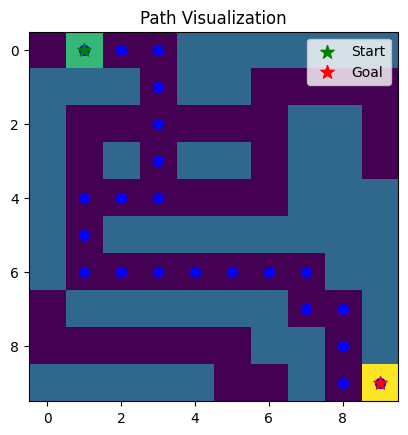

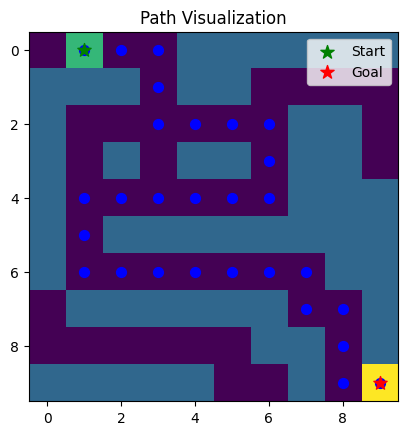

In [67]:
# implementation of DFS
from collections import deque
def dfs(maze, start, goal):
    stack = [start]
    visited = set()
    visited.add(start)
    parent = {start: None}

    while stack:
        current = stack.pop()
        if current == goal:
            path = []
            while current:
                path.append(current)
                current = parent[current]
            return path[::-1]

        for neighbor in get_neighbours(*current):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                stack.append(neighbor)
    return None
path_dfs = dfs(numeric_maze, start_pos, goal_pos)
print("Path from Start to Goal using DFS:", path_dfs)
# Visualize the Path
def visualize_path(maze, path):
    grid = np.array(maze)
    plt.imshow(grid, cmap='viridis')
    
    for y, x in path:
        plt.scatter(x, y, c='b', s=50, marker='o')

    # start = np.argwhere(grid == 2)
    # goal = np.argwhere(grid == 3)

    for y, x in [start_pos]:
        plt.scatter(x, y, c='g', s=100, marker='*', label='Start')

    for y, x in [goal_pos]:
        plt.scatter(x, y, c='r', s=100, marker='*', label='Goal')

    plt.title("Path Visualization")
    plt.legend()
    plt.show()
visualize_path(numeric_maze, path)
visualize_path(numeric_maze, path_dfs)  


### Combined function to ask for eith bfs or dfs, maze and give path and visualize

In [68]:
def pipeline(maze, search_alg):
    numeric_maze = to_numeric_grid(maze)
    start_pos = find_pos(numeric_maze, 2)
    goal_pos = find_pos(numeric_maze, 3)

    if search_alg == 'bfs':
        path = bfs(numeric_maze, start_pos, goal_pos)
    elif search_alg == 'dfs':
        path = dfs(numeric_maze, start_pos, goal_pos)
    else:
        raise ValueError("Invalid search algorithm. Use 'bfs' or 'dfs'.")

    print(f"Path from Start to Goal using {search_alg.upper()}: {path}")
    visualize_path(numeric_maze, path)

Path from Start to Goal using DFS: [(0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (2, 5), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 7), (7, 8), (8, 8), (9, 8), (9, 9)]


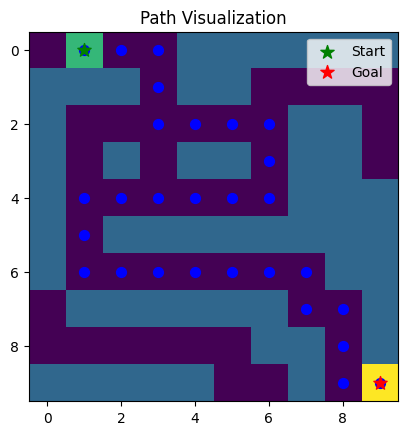

In [69]:

search_alg = input("Enter search algorithm (bfs/dfs): ").strip().lower()
if search_alg not in ['bfs', 'dfs']:
    print("Invalid input. Please enter 'bfs' or 'dfs'.")
else:
    pipeline(maze, search_alg)